<a href="https://colab.research.google.com/github/GiX7000/deep-learning-with-python/blob/main/DeepLearning_with_Python_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning examples from the book 'Deep Learning with Python', Part 1, Francois Chollet

# Example 1. Classify grayscale images(28x28) of handwritten digits from mnist dataset into 10 categories

This is a multi-class Classification problem

Load the data and understand what you really have

In [ ]:
# import the data
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f'X_train: {train_images.shape}')
print(f'y_train: {train_labels.shape}')
print(f'X_test: {test_images.shape}')
print(f'y_test: {test_labels.shape}')

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


1. Pre-process the data: preparing/bringing it to the right form to feed our NN

Vectorization, value Normalization, handling missing values, feature engineering to name but a few of the steps you need to do during pre-processing of your data!

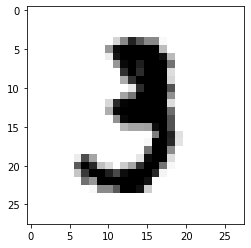

In [ ]:
# first, always explrore your dataset
# let's visualize some examples to see what we have here
import matplotlib.pyplot as plt

plt.imshow(train_images[10], cmap=plt.cm.binary)
plt.show()

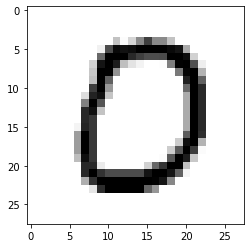

In [ ]:
plt.imshow(test_images[10], cmap=plt.cm.binary)
plt.show()

There are many times in which we need to shuffle the dataset before split it to train and test sets. This is because of data representativeness(more @page100). This is a step during feature engineering like for example feature redundancy you need to do every time you pre-process the data

In [ ]:
# we have 60000 examples(images) that are 28x28 each (on greyscale) and they are all filled with numbers between 0-255(the higher the number is the more grey the image is)
# so, we transform these images in an array of (60000, 28x28) with values between 0 and 1
# and we we actually have 60000 examples of 28*28 length each with values between 0 and 1

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
# one-hot representation for train and test labels. As we have 10 classes to predict as output(output is a number between 0-9 representing the digits)
# we transform the output values from 0-9 to 0-1 one-hot representation

print(f'10th element of train_labels before one-hot: {train_labels[10]}')

# one-hot encoding for output labels
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(f'10th element of train_labels after one-hot: {train_labels[10]}')

10th element of train_labels before one-hot: 3
10th element of train_labels after one-hot: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
# check the new dimensions now
print(f'X_train: {train_images.shape}')
print(f'y_train: {train_labels.shape}')
print(f'X_test: {test_images.shape}')
print(f'y_test: {test_labels.shape}')

X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)


2. Define and train the model 

In [ ]:
# network's architecture
# import the aproppriate modules
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# compilation step
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128) 

# deep learning models don't process an entire dataset at once! they break the data into small batches=> computationaly cheaper
# so batch_size=128 means: 1st batch=train_images[:128], 2nd batch: train_images[128:256], ...train_images[128*n:128*(n+1)]


Epoch 1/5
469/469 [==============================] - 11s 18ms/step - loss: 0.2541 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1026 - accuracy: 0.9698
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0684 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0500 - accuracy: 0.9843
Epoch 5/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0375 - accuracy: 0.9886


In [ ]:
# check some model's info
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


3. Predict and evaluate the model

In [ ]:
# predict
# returns a 10-element for each example with the highest probability in the index which represents a digit

predictions = model.predict(test_images)

print(f'\n the digit-prediction for the first element of test_labels is: {predictions[10]}\n')
print(f'the actual-digit of the first element of test_labels is: {test_labels[10]}')

313/313 [==============================] - 2s 5ms/step

 the digit-prediction for the first element of test_labels is: [9.9998659e-01 1.5300014e-14 1.3191635e-05 1.3249479e-09 9.6179194e-15
 2.9272570e-08 1.2704849e-08 8.0467458e-08 2.5869007e-11 9.7939807e-09]

the actual-digit of the first element of test_labels is: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Example 2. Tensors: the inputs of NNs

Neural Networks take as inputs Tensors. Tensor is a generalization of matrices to a number of dimensions. 
Each tensor has 3 attributes: 1) the rank: number of axis(dimensions), 2) the shape: how many dimensions the tensor has along each axis and 3) data type: the type of the data contained in the tensor 

In [ ]:
import numpy as np

In [ ]:
# Scalar(0D-tensor): rank-0 tensor 
x=np.array(12)
print(x)       

# ndim gives us the axis(=>dimension) of the tensor
print(x.ndim)

12
0


In [ ]:
# Vector(1D-tensor): rank-1 tensor 
x1 = np.array([12, 3, 6, 14, 7])
print(x1)

print(f'the rank of the tensor is: {x1.ndim}')
print(f'the shape of the tensor is: {x1.shape}') 
print(f'the data type of the tensor is: {x1.dtype}')

[12  3  6 14  7]
the rank of the tensor is: 1
the shape of the tensor is: (5,)
the data type of the tensor is: int64


In [ ]:
# Matrice(2D-tensor): rank-2 tensor
x2 = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x2)

print(f'the rank of the tensor is: {x2.ndim}')
print(f'the shape of the tensor is: {x2.shape}') 
print(f'the data type of the tensor is: {x2.dtype}')

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
the rank of the tensor is: 2
the shape of the tensor is: (3, 5)
the data type of the tensor is: int64


In [ ]:
# Matrice(3D-tensor): rank-3 tensor
x3 = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print(x3)

print(f'the rank of the tensor is: {x3.ndim}')
print(f'the shape of the tensor is: {x3.shape}') # the shape of the tensor is the shape of each axis of the tensor
print(f'the data type of the tensor is: {x3.dtype}')

[[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
the rank of the tensor is: 3
the shape of the tensor is: (3, 3, 5)
the data type of the tensor is: int64


In [ ]:
# Matrice(4D-tensor): rank-4 tensor, the same happens to all higher rank tensors
x4 = np.array([
    [
    [[5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]],

    [[5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]],

    [[5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]],
    ],
    [
    [[5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]],

    [[5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]],

    [[5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]],  
    ]
   ])
print(x4)

print(f'the rank of the tensor is: {x4.ndim}')
print(f'the shape of the tensor is: {x4.shape}') # the shape of the tensor is the shape of each axis of the tensor
print(f'the data type of the tensor is: {x4.dtype}')

[[[[ 5 78  2 34  0]
   [ 6 79  3 35  1]
   [ 7 80  4 36  2]]

  [[ 5 78  2 34  0]
   [ 6 79  3 35  1]
   [ 7 80  4 36  2]]

  [[ 5 78  2 34  0]
   [ 6 79  3 35  1]
   [ 7 80  4 36  2]]]


 [[[ 5 78  2 34  0]
   [ 6 79  3 35  1]
   [ 7 80  4 36  2]]

  [[ 5 78  2 34  0]
   [ 6 79  3 35  1]
   [ 7 80  4 36  2]]

  [[ 5 78  2 34  0]
   [ 6 79  3 35  1]
   [ 7 80  4 36  2]]]]
the rank of the tensor is: 4
the shape of the tensor is: (2, 3, 3, 5)
the data type of the tensor is: int64


3 types of operations between tensors: 1) element-wise operations, 2) dot product and 3) reshaping

In [ ]:
# broadcasting: the smaller tensor will be broadcasted to match the shape of the larger tensor when applying two tensor element-wise operations
z1 = np.maximum(x4, x3)
z2 = np.minimum(x4, x2)
z3 = np.maximum(x3, x2)
z4 = np.maximum(x4, x1)

In [ ]:
# 

# Example 3. Classifying movie reviews, based on text content, into positive or negative

This is a Binary Classification problem

Load the data and understand it

In [ ]:
# import the data
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # num_words=10000 means that we only keep the top 10000 most frequently occuring words in the training data
 
print(f'X_train: {train_data.shape}')
print(f'y_train: {train_labels.shape}')
print(f'X_test: {test_data.shape}')
print(f'y_test: {test_labels.shape}')

X_train: (25000,)
y_train: (25000,)
X_test: (25000,)
y_test: (25000,)


In [ ]:
# first, always explrore your dataset
# let's see some examples
print(f'11th example of train_data:\n {train_data[10]}')
print(f'length of 11th example of train_data: {len(train_data[10])}')

print(f'the label of 11th example of train_labels: {train_labels[10]}')

11th example of train_data:
 [1, 785, 189, 438, 47, 110, 142, 7, 6, 7475, 120, 4, 236, 378, 7, 153, 19, 87, 108, 141, 17, 1004, 5, 2, 883, 2, 23, 8, 4, 136, 2, 2, 4, 7475, 43, 1076, 21, 1407, 419, 5, 5202, 120, 91, 682, 189, 2818, 5, 9, 1348, 31, 7, 4, 118, 785, 189, 108, 126, 93, 2, 16, 540, 324, 23, 6, 364, 352, 21, 14, 9, 93, 56, 18, 11, 230, 53, 771, 74, 31, 34, 4, 2834, 7, 4, 22, 5, 14, 11, 471, 9, 2, 34, 4, 321, 487, 5, 116, 15, 6584, 4, 22, 9, 6, 2286, 4, 114, 2679, 23, 107, 293, 1008, 1172, 5, 328, 1236, 4, 1375, 109, 9, 6, 132, 773, 2, 1412, 8, 1172, 18, 7865, 29, 9, 276, 11, 6, 2768, 19, 289, 409, 4, 5341, 2140, 2, 648, 1430, 2, 8914, 5, 27, 3000, 1432, 7130, 103, 6, 346, 137, 11, 4, 2768, 295, 36, 7740, 725, 6, 3208, 273, 11, 4, 1513, 15, 1367, 35, 154, 2, 103, 2, 173, 7, 12, 36, 515, 3547, 94, 2547, 1722, 5, 3547, 36, 203, 30, 502, 8, 361, 12, 8, 989, 143, 4, 1172, 3404, 10, 10, 328, 1236, 9, 6, 55, 221, 2989, 5, 146, 165, 179, 770, 15, 50, 713, 53, 108, 448, 23, 12, 17, 22

Pre-process the data: preparing/bringing it to the right form to feed our NN

Our train/test data here is comprised of examples(rows) of text reviews that are represented by a list of 450 integers(integers are the indexes of the word in the 10000 corpus we took from imbd database).
We can't feed a NN with lists of integers. we need to turn them into Tensors. 2 ways to do that: a) word embedding and b) one-hot encoding to turn integer lists to vectors of 0s and 1s

In [ ]:
# encoding the integer sequences via multi-hot encoding for train and test data: each example now is a 10000 sequence
# if a word is on corpus of 10000, then 1 is representing the index of that word in the corpus. if a word is not in the corpus, we put 0 
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# vectorize the labels   
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
print(f'X_train after preprocessing: {x_train.shape}')
print(f'y_train after preprocessing: {y_train.shape}')
print(f'X_test after preprocessing: {x_test.shape}')
print(f'y_test after preprocessing: {y_test.shape}')

X_train after preprocessing: (25000, 10000)
y_train after preprocessing: (25000,)
X_test after preprocessing: (25000, 10000)
y_test after preprocessing: (25000,)


In [ ]:
print(f'length of 11th example of train_data after preprocessing: {x_train[10].shape}')
print(f'11th example of train_data after preprocessing:\n {x_train[10]}')
print(f'the label of 11th example of train_labels after preprocessing: {y_train[10]}')

print(f'\n11th example of x_test after preprocessing:\n {x_test[10]}')
print(f'the label of 11th example of test_labels after preprocessing: {y_test[10]}')

length of 11th example of train_data after preprocessing: (10000,)
11th example of train_data after preprocessing:
 [0. 1. 1. ... 0. 0. 0.]
the label of 11th example of train_labels after preprocessing: 1.0

11th example of x_test after preprocessing:
 [0. 1. 1. ... 0. 0. 0.]
the label of 11th example of test_labels after preprocessing: 1.0


Define, compile and train the NN model

Every model is not the best initially and always needs improvements via hyperparameter tuning process. So, always create a validation set to test the model and when find the best hyperparameters, train the final model on test set. 3 ways to create a validation set: 1) simple hold-out validation, 2) K-fold validation and 3) iterated K-fold validation with shuffling(more @page98)

In [ ]:
# model definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# training the model
print('training ...\n')
history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=512)

# (also in order to monitor during the training the accuracy of the model on data it has never seen before, let's create a validation set) 
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# training the model by monitoring how the model performs on unseen data
print('\n\ntraining with validation ...\n')
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

training ...

Epoch 1/5
49/49 [==============================] - 6s 96ms/step - loss: 0.4353 - accuracy: 0.8302
Epoch 2/5
49/49 [==============================] - 2s 35ms/step - loss: 0.2562 - accuracy: 0.9090
Epoch 3/5
49/49 [==============================] - 2s 35ms/step - loss: 0.1974 - accuracy: 0.9307
Epoch 4/5
49/49 [==============================] - 3s 61ms/step - loss: 0.1649 - accuracy: 0.9415
Epoch 5/5
49/49 [==============================] - 2s 35ms/step - loss: 0.1416 - accuracy: 0.9502


training with validation ...

Epoch 1/9
47/47 [==============================] - 2s 42ms/step - loss: 0.1234 - accuracy: 0.9576 - val_loss: 0.1134 - val_accuracy: 0.9580
Epoch 2/9
47/47 [==============================] - 2s 38ms/step - loss: 0.1046 - accuracy: 0.9651 - val_loss: 0.1314 - val_accuracy: 0.9530
Epoch 3/9
47/47 [==============================] - 2s 52ms/step - loss: 0.0906 - accuracy: 0.9698 - val_loss: 0.1500 - val_accuracy: 0.9400
Epoch 4/9
47/47 [===========================

In [ ]:
# check some model's info
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


model.fit returns a History object, which is a dictionary cantaining data about everything happened during training. Dictionary's elements are all metrics which were being monitored during training

In [ ]:
# in our case history includes data for loss, accuracy, val_loss and val_accuracy
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plot loss and accuracy of the model 

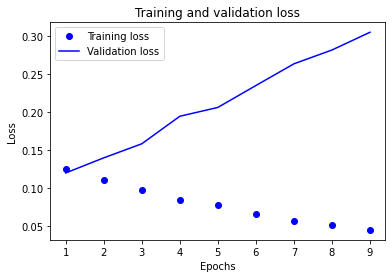

In [ ]:
# plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

as we can see, this is an example of overfitting(high variance): our model can't generalize on new, unseen data

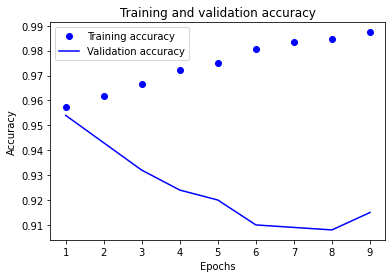

In [ ]:
# plotting the training and validation accuracy
plt.clf() # clear the existing figure
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Evaluate the model and improve it

after the 3rd epoch, our model is getting worse in performance, so it needs several improvement steps. Hyperparameter Tuning is a process that helps us make our model better. We can try to add more hidden layers or more units to them, try different loss function where is applicable, try different activation function, try also different numbers of epochs, batch_size, and generally tune all the hyperparameters of the model(we call parameters of the model its weights and bs)

In our case here, we just limit our model to 4 epochs, as after that it is getting worse. The new model is just the old model trained for 4 epochs!

In [ ]:
# evaluate the model
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 6s 7ms/step - loss: 0.6667 - accuracy: 0.8456


[0.6667125225067139, 0.8455600142478943]

Retrain the model from scratch 

In [ ]:
# define the new model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# training the model
print('training ...\n')
history = model.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512)

training ...

Epoch 1/4
49/49 [==============================] - 6s 107ms/step - loss: 0.4401 - accuracy: 0.8229
Epoch 2/4
49/49 [==============================] - 2s 43ms/step - loss: 0.2562 - accuracy: 0.9089
Epoch 3/4
49/49 [==============================] - 2s 43ms/step - loss: 0.1959 - accuracy: 0.9307
Epoch 4/4
49/49 [==============================] - 3s 56ms/step - loss: 0.1648 - accuracy: 0.9418


In [ ]:
# check some info of the new model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


Plot loss and accuracy of the new model

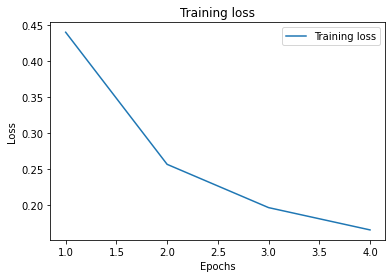

In [ ]:
# plotting the training loss
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label="Training loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

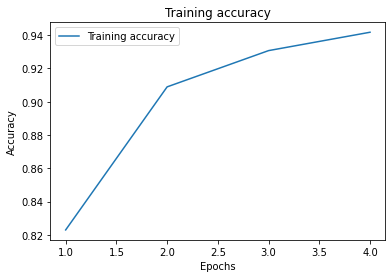

In [ ]:
# plotting the training accuracy
plt.clf() # clear the existing figure
acc = history.history["accuracy"]
plt.plot(epochs, acc, label="Training accuracy")
plt.title("Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Evaluate the model and predict

In [ ]:
# evaluate the model
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 8s 10ms/step - loss: 0.3034 - accuracy: 0.8811


[0.30336320400238037, 0.8811200261116028]

As we can see, the loss has decreased and the accuracy is improved. So, this new model performs better than the old one

Make predictions and explore/understand the results

In [ ]:
# model's predictions
predictions = model.predict(x_test)

782/782 [==============================] - 7s 8ms/step


In [ ]:
predictions

array([[0.16233885],
       [0.9996952 ],
       [0.5383056 ],
       ...,
       [0.11845585],
       [0.05670902],
       [0.567876  ]], dtype=float32)

In [ ]:
predictions[10] # which is a close to 1=>a positive review, as we initially have seen it!

array([0.93629014], dtype=float32)

Generally, to prevent your model from Overfitting: 1) get more training data, 2) reduce the capacity of the network, 3) add weight regularization and 4) add dropout layers. To prevent your model from Underfitting in NNs just try a bigger network!(from page 104)

# Example 4. Classifying newswires, based on text content, into 46 topics

This is a multi-class Classification problem

Load the data and understand it

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) # num_words=10000 means that we only keep the top 10000 most frequently occuring words in the training data
 
print(f'X_train: {train_data.shape}')
print(f'y_train: {train_labels.shape}')
print(f'X_test: {test_data.shape}')
print(f'y_test: {test_labels.shape}')

X_train: (8982,)
y_train: (8982,)
X_test: (2246,)
y_test: (2246,)


In [ ]:
# first, always explrore your dataset
# let's see some examples
print(f'11th example of train_data:\n {train_data[10]}')
print(f'length of 11th example of train_data: {len(train_data[10])}')

print(f'the label of 11th example of train_labels: {train_labels[10]}')
print(f'the label of 11th example of test_labels: {test_labels[10]}\n')
print(f'the first 11 elements of train_labels: {train_labels[:11]}')

11th example of train_data:
 [1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
length of 11th example of train_data: 31
the label of 11th example of train_labels: 3
the label of 11th example of test_labels: 5

the first 11 elements of train_labels: [ 3  4  3  4  4  4  4  3  3 16  3]


As with the imdb's reviews, each example here is also a list of integers(word indices)

Prepare the data for the NN

In [ ]:
# encoding the integer sequences via multi-hot encoding for train_data and test_data: each example now is a 10000 sequence of 0s and 1s
# if a word is on corpus of 10000, we have 1 and if a word is not in the corpus, we have 0
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

There are 2 ways to handle the labels/targets in such cases: 1) one-hot(categorical) encoding in which we use loss=categorical_crossentropy(and dtype is float) and 2) labels as integers in which we use sparse_categorical_crossentropy(dtype here is int, more @page 83)

In [ ]:
# one-hot encoding for the train and test labels
# (a 46 dimensional list with 0s and 1s)
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
print(f'X_train after preprocessing: {x_train.shape}')
print(f'y_train after preprocessing: {one_hot_train_labels.shape}')
print(f'X_test after preprocessing: {x_test.shape}')
print(f'y_test after preprocessing: {one_hot_test_labels.shape}')

X_train after preprocessing: (8982, 10000)
y_train after preprocessing: (8982, 46)
X_test after preprocessing: (2246, 10000)
y_test after preprocessing: (2246, 46)


In [ ]:
print(f'length of 11th example of train_data after preprocessing: {x_train[10].shape}')
print(f'11th example of train_data after preprocessing:\n {x_train[10]}')
print(f'the label of 11th example of train_labels after preprocessing: {one_hot_train_labels[10]}')

print(f'\n11th example of x_test after preprocessing:\n {x_test[10]}')
print(f'the label of 11th example of test_labels after preprocessing: {one_hot_test_labels[10]}')

length of 11th example of train_data after preprocessing: (10000,)
11th example of train_data after preprocessing:
 [0. 1. 0. ... 0. 0. 0.]
the label of 11th example of train_labels after preprocessing: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

11th example of x_test after preprocessing:
 [0. 1. 1. ... 0. 0. 0.]
the label of 11th example of test_labels after preprocessing: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Define and train the model

In [ ]:
# model's architecture
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# model's compiling
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# create a validation set 
# every model is not the best initially and always needs improvements via hyperparameter tuning. So, always create a validation set to test the model and when find the best tuning, train the final model on test set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# start training
print('training ...\n')
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

training ...

Epoch 1/20
16/16 [==============================] - 4s 215ms/step - loss: 2.6660 - accuracy: 0.5316 - val_loss: 1.7728 - val_accuracy: 0.6590
Epoch 2/20
16/16 [==============================] - 1s 91ms/step - loss: 1.4426 - accuracy: 0.7076 - val_loss: 1.3066 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 1s 60ms/step - loss: 1.0516 - accuracy: 0.7732 - val_loss: 1.1531 - val_accuracy: 0.7330
Epoch 4/20
16/16 [==============================] - 1s 91ms/step - loss: 0.8257 - accuracy: 0.8231 - val_loss: 1.0236 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 62ms/step - loss: 0.6555 - accuracy: 0.8636 - val_loss: 0.9531 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 1s 89ms/step - loss: 0.5231 - accuracy: 0.8920 - val_loss: 0.9036 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 0.4186 - accuracy: 0.9123 - val_loss: 0.8899 - val_accuracy: 0.812

In [ ]:
# check some info of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


Plotting the training .vs validation loss and accuracy and Evaluating the model

In [ ]:
# see what we have in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

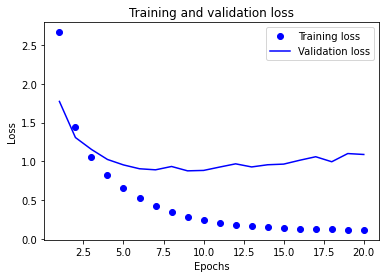

In [ ]:
# plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

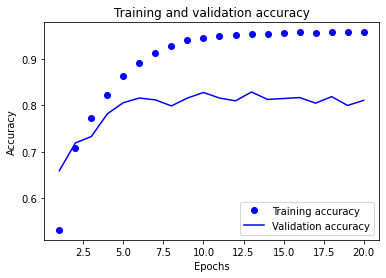

In [ ]:
# plotting the training and validation accuracy
plt.clf() # clear the existing figure
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In this case, the model starts to overfit after 8 epochs. So, we train a new model with 9 epochs

In [ ]:
# evaluate the model
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 4ms/step - loss: 1.2568 - accuracy: 0.7841


[1.256787896156311, 0.784060537815094]

Retrain from scratch a new model, Evaluate it and Predict

To improve the previous model, we train it again with just 9 epochs only

In [ ]:
# model's architecture
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# model's compiling
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# start training
print('training ...\n')
history = model.fit(x_train,
                    one_hot_train_labels,
                    epochs=8,
                    batch_size=512)

training ...

Epoch 1/8
18/18 [==============================] - 2s 59ms/step - loss: 2.4377 - accuracy: 0.5331
Epoch 2/8
18/18 [==============================] - 2s 88ms/step - loss: 1.3336 - accuracy: 0.7110
Epoch 3/8
18/18 [==============================] - 1s 70ms/step - loss: 0.9873 - accuracy: 0.7828
Epoch 4/8
18/18 [==============================] - 2s 93ms/step - loss: 0.7657 - accuracy: 0.8332
Epoch 5/8
18/18 [==============================] - 3s 197ms/step - loss: 0.6045 - accuracy: 0.8704
Epoch 6/8
18/18 [==============================] - 1s 68ms/step - loss: 0.4796 - accuracy: 0.8980
Epoch 7/8
18/18 [==============================] - 2s 89ms/step - loss: 0.3800 - accuracy: 0.9172
Epoch 8/8
18/18 [==============================] - 1s 56ms/step - loss: 0.3118 - accuracy: 0.9281


In [ ]:
# check some info of the new model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640064    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# evaluate this new model
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 2s 30ms/step - loss: 0.9289 - accuracy: 0.7965


[0.9289433360099792, 0.7965271472930908]

2 models have almost the same accuracy, but the new one has significatly decreased loss

In [ ]:
# model's predictions. understand what the results are
predictions = model.predict(x_test)

71/71 [==============================] - 0s 6ms/step


In [ ]:
predictions

In [ ]:
# every prediction is comprised of 46 probs vector
predictions[10].shape

(46,)

In [ ]:
# take a prediction vector
predictions[10] 

array([2.26412062e-03, 9.12307620e-01, 1.73646421e-03, 9.05314519e-04,
       6.92098122e-03, 2.52958965e-02, 7.58594892e-04, 2.24091971e-04,
       9.78066510e-06, 1.11424585e-03, 1.27960229e-02, 2.81922083e-04,
       1.17566095e-04, 4.54508699e-04, 1.56262179e-03, 3.30960378e-04,
       1.27479216e-04, 2.39883098e-04, 1.92524050e-04, 1.22233725e-03,
       9.03669163e-04, 5.76941762e-04, 3.34238540e-03, 2.13922863e-03,
       1.41469510e-02, 8.83744331e-04, 2.45795032e-04, 4.23668273e-04,
       1.90938672e-03, 4.20893746e-04, 7.63645367e-05, 1.40431244e-03,
       1.90489693e-03, 2.87322706e-04, 1.39482963e-05, 2.67029591e-05,
       3.75945201e-05, 4.14669994e-05, 1.92056978e-04, 6.12927906e-05,
       8.17486609e-04, 6.29354094e-04, 4.63092001e-04, 3.25627880e-05,
       9.60659963e-05, 5.97688231e-05], dtype=float32)

In [ ]:
# index of the highest probability. check it above
np.argmax(predictions[10])

1

In [ ]:
# coefficients of each vector of 46 elements must have sum=1 
np.sum(predictions[10])

0.9999999

In [ ]:
# and check manually if the prediction is correct 
one_hot_test_labels[10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Example 5. Predicting house prices

This is a linear regression problem

Load the data

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(f'X_train: {train_data.shape}')
print(f'y_train: {train_targets.shape}')
print(f'X_test: {test_data.shape}')
print(f'y_test: {test_targets.shape}')

X_train: (404, 13)
y_train: (404,)
X_test: (102, 13)
y_test: (102,)


In [2]:
# first, always explrore your dataset
# let's see some examples
print(f'11th example of train_data:\n {train_data[10]}')
print(f'length of 11th example of train_data: {len(train_data[10])}')

print(f'the label of 11th example of train_labels: {train_targets[10]}')
print(f'the label of 11th example of test_labels: {test_targets[10]}\n')
print(f'the first 11 elements of train_labels: {train_targets[:11]}')

11th example of train_data:
 [  9.59571   0.       18.1       0.        0.693     6.404   100.
   1.639    24.      666.       20.2     376.11     20.31   ]
length of 11th example of train_data: 13
the label of 11th example of train_labels: 12.1
the label of 11th example of test_labels: 18.6

the first 11 elements of train_labels: [15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1]


Prepare the data

In [3]:
# normalization of the train and test data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Build, Train and Evaluate the model using K-fold cross-validation

In [4]:
# building function of the model
from tensorflow import keras
from tensorflow.keras import layers

# when little data available for training, we use a small network!
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

To get a best model, we need a validation set in order to use it as an intermediate dataset to improve it, as we always do. However, having so few examples in the train_data, a small validation set does not help, so we split the train_data into k partitions, build, train(on k-1 partitions) and evaluate(on k partition) k models. The final model is the average of k models(more @page87)

In [5]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]  
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16)#, verbose=0
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Epoch 1/500
19/19 [==============================] - 2s 11ms/step - loss: 497.0964 - mae: 20.4045 - val_loss: 405.9922 - val_mae: 17.7957
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 354.2267 - mae: 16.8139 - val_loss: 253.8676 - val_mae: 13.5586
Epoch 3/500
19/19 [==============================] - 0s 5ms/step - loss: 207.3270 - mae: 12.3005 - val_loss: 121.8844 - val_mae: 8.7699
Epoch 4/500
19/19 [==============================] - 0s 5ms/step - loss: 101.1403 - mae: 7.9170 - val_loss: 56.5331 - val_mae: 5.3890
Epoch 5/500
19/19 [==============================] - 0s 5ms/step - loss: 53.4007 - mae: 5.5904 - val_loss: 38.3350 - val_mae: 4.0848
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 37.6708 - mae: 4.6078 - val_loss: 32.3809 - val_mae: 3.6018
Epoch 7/500
19/19 [==============================] - 0s 4ms/step - loss: 31.0968 - mae: 4.0677 - val_loss: 29.6878 - val_mae: 3.4491
Epoch 8/500
19/19 [==================

In [6]:
# check some info of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [7]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [8]:
len(average_mae_history)

500

In [9]:
average_mae_history

[19.142247200012207,
 15.327553033828735,
 10.700769662857056,
 7.0130733251571655,
 5.454574942588806,
 4.7011436223983765,
 4.248166024684906,
 3.9593061208724976,
 3.7256081104278564,
 3.547416031360626,
 3.426893413066864,
 3.3134610652923584,
 3.2042881846427917,
 3.062356650829315,
 3.007704734802246,
 2.9396342635154724,
 2.9438436031341553,
 2.9089996218681335,
 2.7892608046531677,
 2.8169206380844116,
 2.7475637197494507,
 2.7082607746124268,
 2.675617516040802,
 2.623228430747986,
 2.64769583940506,
 2.5947539806365967,
 2.657393455505371,
 2.659130096435547,
 2.593321919441223,
 2.5664945244789124,
 2.524509906768799,
 2.5394167304039,
 2.514582335948944,
 2.52817302942276,
 2.515795648097992,
 2.4613752365112305,
 2.5551562309265137,
 2.467925548553467,
 2.5407687425613403,
 2.4703394770622253,
 2.422700822353363,
 2.458666682243347,
 2.457096517086029,
 2.476432979106903,
 2.429387867450714,
 2.391879826784134,
 2.425384223461151,
 2.456084907054901,
 2.447623908519745,
 2

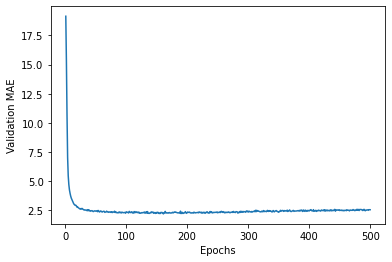

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

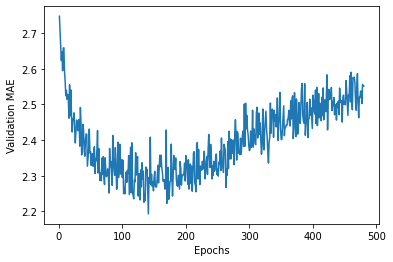

In [11]:
# to see better the above plot, let's exclude some first points(20)
truncated_mae_history = average_mae_history[20:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

As we can see here, after 200 epochs, the model is getting worse. So, let's build a new one with let's say 130 epochs!

In [12]:
# evaluate this model
results = model.evaluate(test_data, test_targets)  # returns test_mse_score, test_mae_score
results

4/4 [==============================] - 0s 3ms/step - loss: 18.9302 - mae: 2.8036


[18.93019676208496, 2.803575038909912]

As we can also see in evaluation results, mainly in loss(mse), the model is not good, so we need to improve it

The final model

In [13]:
# build and train the final model by limiting the number of epochs to 130
model = build_model()

history = model.fit(train_data, train_targets,
          epochs=130, batch_size=16)

Epoch 1/130
26/26 [==============================] - 1s 12ms/step - loss: 531.6440 - mae: 21.1361
Epoch 2/130
26/26 [==============================] - 0s 3ms/step - loss: 374.9178 - mae: 17.2057
Epoch 3/130
26/26 [==============================] - 0s 3ms/step - loss: 206.8637 - mae: 12.0583
Epoch 4/130
26/26 [==============================] - 0s 3ms/step - loss: 89.8668 - mae: 7.2498
Epoch 5/130
26/26 [==============================] - 0s 3ms/step - loss: 48.7396 - mae: 5.2013
Epoch 6/130
26/26 [==============================] - 0s 3ms/step - loss: 32.5085 - mae: 4.1763
Epoch 7/130
26/26 [==============================] - 0s 3ms/step - loss: 24.1644 - mae: 3.5032
Epoch 8/130
26/26 [==============================] - 0s 3ms/step - loss: 20.2203 - mae: 3.1137
Epoch 9/130
26/26 [==============================] - 0s 3ms/step - loss: 17.6646 - mae: 2.9076
Epoch 10/130
26/26 [==============================] - 0s 3ms/step - loss: 16.1857 - mae: 2.8034
Epoch 11/130
26/26 [======================

In [14]:
# check some info of the final model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                896       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [16]:
# evaluate this final model
results = model.evaluate(test_data, test_targets)  # returns test_mse_score, test_mae_score
results

4/4 [==============================] - 0s 3ms/step - loss: 16.2499 - mae: 2.7228


[16.249860763549805, 2.722780704498291]

Mse and mae here are decreased from the previous ones

In [17]:
# model's predictions. understand the outputs
predictions = model.predict(test_data)

4/4 [==============================] - 0s 2ms/step


In [21]:
predictions.shape

(102, 1)

In [20]:
# every prediction is a scalar
predictions[10].shape

(1,)

In [22]:
# take a prediction 
predictions[10] 

array([22.84524], dtype=float32)

In [23]:
# and check it manually with its initial test_target 
test_targets[10]

18.6

prediction[10] and test_target[10] are different, however their distance is small. That's what we are trying to do in all ml and dl problems: to minimize this distance!

Generally, the universal workflow in machine learning(especially when working with NNs):

1. Define the problem and collect the data
2. Choose the metrics
3. Prepare your data and split to train/val/test sets
4. Build, train and evaluate the first model
5. Improve the model via addressing overfitting and hyperparameter tuning